In [63]:
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
df = pd.read_csv('Telco-Customer-Churn.csv')

In [64]:
# removed unused columns
df.drop(axis='columns', labels='customerID', inplace=True)

In [65]:
#convert TotalCharges to numeric
rows_to_drop = df[pd.to_numeric(df.TotalCharges, errors='coerce').isnull()].index.values
df.drop(axis='index', index=rows_to_drop, inplace=True)
df.TotalCharges = pd.to_numeric(df.TotalCharges)

#normalise additional values if needed.
df.replace('No internet service', 'No', inplace=True)
df.replace('No phone service', 'No', inplace=True)

#convert yes/no columns to 1/0
for col in ['Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'PaperlessBilling', 'Churn']:
    df[col] = df[col].map({'Yes': 1, 'No': 0})

#convert male/female to 0/1
df.replace({'Female': 1, 'Male': 0}, inplace=True)

C:\Users\user\AppData\Local\Temp\ipykernel_19776\454707161.py:15: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df.replace({'Female': 1, 'Male': 0}, inplace=True)


In [66]:
# convert categorical columns as one-hot encoding
df = pd.get_dummies(df, columns=['InternetService', 'Contract', 'PaymentMethod'], dtype=np.uint8)

In [67]:
# scale range columns to make them easy for training
from sklearn.preprocessing import MinMaxScaler

cols_to_scale = ['tenure', 'MonthlyCharges', 'TotalCharges']
scaler = MinMaxScaler()
df[cols_to_scale] = scaler.fit_transform(df[cols_to_scale])

In [69]:
#split data into training and testing
from sklearn.model_selection import train_test_split

X = df.drop(axis='columns', labels='Churn')
y = df['Churn']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=5)

In [72]:
import tensorflow as tf
from tensorflow import keras

model = keras.Sequential([
    keras.layers.Dense(20, input_shape=(26,), activation='relu'),
    keras.layers.Dense(15, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid') # sigmoid because we want to predict 0 or 1
])

model.compile(optimizer='adam', 
              loss='binary_crossentropy', # because we are predicting 0 or 1 
              metrics=['accuracy'])

model.fit(X_train, y_train, epochs=100)

c:\Users\user\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/100
176/176 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.6799 - loss: 0.5933
Epoch 2/100
176/176 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8013 - loss: 0.4254
Epoch 3/100
176/176 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7957 - loss: 0.4217
Epoch 4/100
176/176 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8020 - loss: 0.4140
Epoch 5/100
176/176 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8008 - loss: 0.4250
Epoch 6/100
176/176 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8063 - loss: 0.4157
Epoch 7/100
176/176 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8161 - loss: 0.3989
Epoch 8/100
176/176 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7966 - loss: 0.4263
Epoch 9/100
176/176 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8044 - loss: 0.4080
Epoch 10/100
176/176 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8133 - loss: 0.4037
Epoch 11/100
176/176 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8119 - loss: 0.3990
Epoch 12/100
176/176 ━━━━━━━━━━━━━━━━━━━━

In [73]:
predictions = model.predict(X_test)

44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step


In [163]:
samples = 10

X_test_sample = X_test[:samples]
pred_sample = [np.round(i) for i in predictions[:samples]]
test_sample = y_test[:samples]

for i in range(samples):
    print (f"{X_test_sample.index[i]}:{pred_sample[i]} {'=' if pred_sample[i] == test_sample.values[i] else '!='} {test_sample.index[i]}:{test_sample.values[i]}")

2660:[0.] = 2660:0
744:[1.] != 744:0
5579:[0.] != 5579:1
64:[1.] = 64:1
3287:[0.] != 3287:1
816:[1.] = 816:1
2670:[0.] = 2670:0
5920:[0.] = 5920:0
1023:[0.] = 1023:0
6087:[0.] = 6087:0


[[881 118]
 [204 204]]


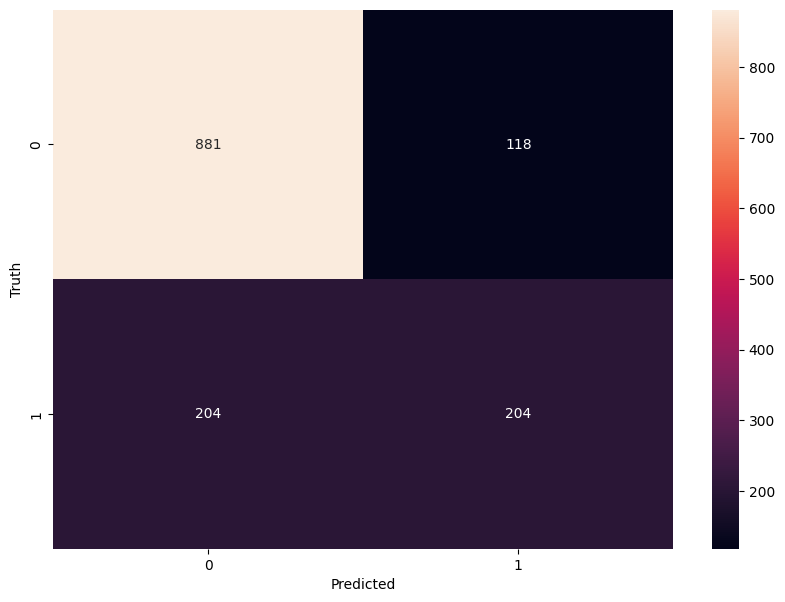

In [169]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sn

print(confusion_matrix(y_test, np.round(predictions)))

plt.figure(figsize=(10, 7))
sn.heatmap(confusion_matrix(y_test, np.round(predictions)), annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.show()